
# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. These are age, gender, health problems like diabetes, hypertension, alchoholism and number of handicaps the patients have. There is also information about the day the patient set up their appointment - ScheduledDay, the day patient called or registered the appointment - AppointmentDay, where the appointment takes place - Neighbourhood, whether or not the patient is enrolled in Brasilian welfare program Bolsa Família - Scholarship, whether or not the patient recieved an SMS as a reminder - SMS_recieved.
I consider No-show as a dependent variable which provides the information about whether the patient showed up or not showed up the appointment. Age, Gender, Scholarship, Handicap, Diabetes, Hypertension, Alchoholism, SMS_received, Elapsed_time are the independent variables I use in this analysis.

Questions to be analyzed:
1. What is the relationship between age and showing up behavior?
2. What is the relationship between showing up and gender?
3. How are recieving SMS and showing up related?
4. How does recieving SMS affect showing up behavior based on gender?
5. What is the relationship between showing up and handicap levels?
6. How does enrolling in Bolsa Familia program affect showing up behavior?
7. How does holding scholarship affect showing up behavior based on gender?
8. What is the effect of each diagnosis on showing up behavior based on gender?
9. How the appointment day and the showing up is related?
10. How does the time difference between the scheluded day and appointment day affect the showing up behavior? 


In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
df = pd.read_csv('noshow-appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Check for duplicates
df.duplicated().sum()

0

### Data Cleaning
- Fix typos in column names (AppointmentID, Hipertension, Handcap, No-show).
- Correct data types of the columns *PatientId*, *AppointmentID*,  *ScheduledDay*, *AppointmentDay*.
- Extract only date from the columns *ScheduledDay* and *AppointmentDay*, exclude time.
- Remove outliers in the *Age* column. 
- Find the time between AppointmentDay and ScheduledDay and create *Elapsed_time* column.
- Change 'Yes' as 1 and 'No' as 0 in the *No_show* column. 0 if the patient showed up to their appointment, and 1 if they did not show up.
- Create a column *Weekday* where Monday is 1 and Sunday is 7.
- Find the time between AppointmentDay and ScheduledDay and create *Elapsed_time* column.

#### Fix typos in column names.

In [7]:
df.rename(columns = {'AppointmentID':'AppointmentId',
                     'Hipertension': 'Hypertension',
                     'Handcap': 'Handicap',
                     'No-show': 'No_show'}, inplace = True)
print(df.columns)

Index(['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


#### Correct data types of the columns *PatientId*, *AppointmentID*,  *ScheduledDay*, *AppointmentDay*.

In [8]:
df['PatientId'] = df['PatientId'].astype(str).replace('\.0', '', regex=True)
df['AppointmentId'] = df['AppointmentId'].astype(str)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#### Extract only date, exclude time.

In [9]:
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.strftime('%d-%m-%Y')) 
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x.strftime('%d-%m-%Y'))

#### Convert them to datetime again.

In [10]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentId     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 11.8+ MB


In [12]:
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Check for erroneous data

In [13]:
print('Gender:',df.Gender.unique())
print('Age:',sorted(df.Age.unique()))
print('Scholarship:',df.Scholarship.unique())
print('Hypertension:',df.Hypertension.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Handicap:',df.Handicap.unique())
print('SMS_received:',df.SMS_received.unique())
print('No_show:',df.No_show.unique())


Gender: ['F' 'M']
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Scholarship: [0 1]
Hypertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handicap: [0 1 2 3 4]
SMS_received: [0 1]
No_show: ['No' 'Yes']


#### Remove outliers in the *Age* column. 

In [14]:
df = df[(df.Age >= 0) & (df.Age <= 95)]
print('Age:',sorted(df.Age.unique()))

Age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


#### Change 'Yes' as 1 and 'No' as 0 in the *No_show* column. 0 if the patient showed up to their appointment, and 1 if they did not show up.

In [15]:
df['No_show'] = df['No_show'].map({'Yes':1, 'No':0})

#### Create a column *Weekday* by using the function  `isoweekday()` which returns the day of the week as an integer, where Monday is 1 and Sunday is 7.

In [16]:
df['Weekday'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())
print('Weekday:',sorted(df.Weekday.unique()))

Weekday: [1, 2, 3, 4, 5, 6, 7]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110480 non-null object
AppointmentId     110480 non-null object
Gender            110480 non-null object
ScheduledDay      110480 non-null datetime64[ns]
AppointmentDay    110480 non-null datetime64[ns]
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null int64
Hypertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handicap          110480 non-null int64
SMS_received      110480 non-null int64
No_show           110480 non-null int64
Weekday           110480 non-null int64
dtypes: datetime64[ns](2), int64(9), object(4)
memory usage: 13.5+ MB


#### Find the time between *AppointmentDay* and *ScheduledDay* and create *Elapsed_time* column.

In [18]:
df['Elapsed_time'] = df['AppointmentDay'] - df['ScheduledDay']
df['Elapsed_time'] = df['Elapsed_time'].dt.days

In [19]:
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Weekday,Elapsed_time
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5,0
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5,0
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,5,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5,0
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5,0


<a id='eda'></a>
## Exploratory Data Analysis


#### Display the histograms.

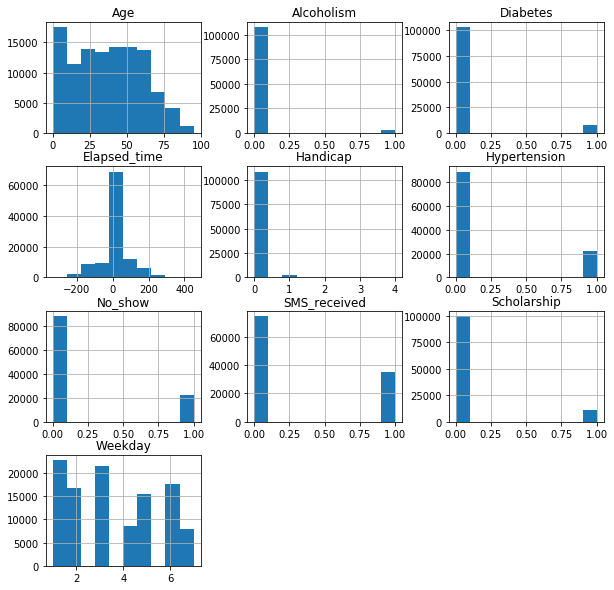

In [20]:
df.hist(figsize=(10,10));

#### Have a look at the summary statistics.

In [21]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Weekday,Elapsed_time
count,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000
mean,37.063342,0.098307,0.197076,0.071841,0.030413,0.022167,0.321126,0.201955,3.557748,7.169243
std,23.079712,0.297731,0.397792,0.258226,0.171721,0.161252,0.466911,0.401461,1.970417,84.924206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-334.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,31.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,7.000000,451.000000


- Average age is 37.
- Almost 10 percent of the patients are enrolled to the welfare program.
- 20 percent of the patients have hypertension, 7 percent has diabetes, 3 percent has alcoholism.
- 32 percent recieved SMS.
- Most of the appointments are on Wednesday.
- Overall, 20 percent of the patients did not showed up to their appointment.

#### Look at the time span

In [22]:
df.AppointmentDay.unique(), df.AppointmentDay.nunique()

(array(['2016-04-29T00:00:00.000000000', '2016-03-05T00:00:00.000000000',
        '2016-10-05T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
        '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
        '2016-02-05T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
        '2016-05-16T00:00:00.000000000', '2016-04-05T00:00:00.000000000',
        '2016-05-19T00:00:00.000000000', '2016-12-05T00:00:00.000000000',
        '2016-06-05T00:00:00.000000000', '2016-05-20T00:00:00.000000000',
        '2016-05-05T00:00:00.000000000', '2016-05-13T00:00:00.000000000',
        '2016-09-05T00:00:00.000000000', '2016-05-25T00:00:00.000000000',
        '2016-11-05T00:00:00.000000000', '2016-05-18T00:00:00.000000000',
        '2016-05-14T00:00:00.000000000', '2016-02-06T00:00:00.000000000',
        '2016-03-06T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
        '2016-07-06T00:00:00.000000000', '2016-01-06T00:00:00.000000000',
        '2016-08-06T00:00:00.000000000

This data consists the appointments between the dates 01.06.2016 and 05.12.2016,only in a six-month time span, however there are only 27 unique days.

#### Look at the distribution of missing appointments.

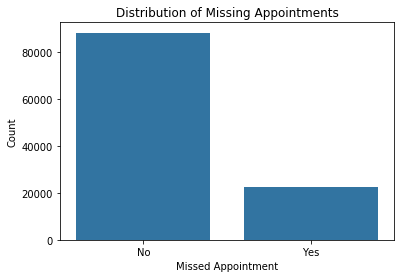

In [23]:
# Set color
base_color = sb.color_palette()[0]

sb.countplot(x='No_show', data=df, color = base_color);
plt.xticks(np.arange(2), ('No', 'Yes'));
plt.xlabel('Missed Appointment');
plt.ylabel('Count');

plt.title('Distribution of Missing Appointments');

20 percent of the patients did not show up to their appointment.

#### Create masks for the rows where patients did not show and the rows where they showed.

In [24]:
not_showed = df.No_show == True
showed = df.No_show == False

### What is the relationship between age and showing up behavior?

In [25]:
df.Age[showed].mean()

37.763757825968604

In [26]:
df.Age[not_showed].mean()

34.295580853352455

There is not much difference between the mean ages of the patients who showed up (37.76) and who did not (34.29).

#### Display the distribution of age of the patients who showed up and who did not in the same graph.

In [27]:
# Set the style
sb.set(style="darkgrid")

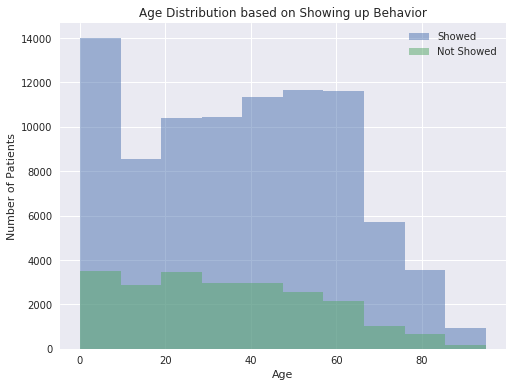

In [28]:
df.Age[showed].hist(alpha=0.5, label = 'Showed', figsize=(8,6));
df.Age[not_showed].hist(alpha=0.5, label = 'Not Showed', figsize=(8,6));
plt.legend();
plt.xlabel('Age');
plt.ylabel('Number of Patients');
plt.title("Age Distribution based on Showing up Behavior" );


In each age group the number of the showed patients are much more higher than the unshowed patients.

#### Find the probability of not showing up based on age.

In [29]:
# create a function that finds the probability of not showing up wrt an independent variable
def prob_no_show(dataset, name):    
    df_No_show = pd.crosstab(index = dataset[name], columns = dataset['No_show']).reset_index()
    # calculate probability of not showing up
    df_No_show['prob_no_show'] = df_No_show[1] / (df_No_show[1] + df_No_show[0])
    print("The age with the lowest not showing up probability is {} ".format(df_No_show['prob_no_show'].idxmin()))
    print("The age with the highest not showing up probability is {} ".format(df_No_show['prob_no_show'].idxmax()))

    return df_No_show[[name, 'prob_no_show']]

#### Display the relationship between Age and Probability of Missing Appointment

The age with the lowest not showing up probability is 88 
The age with the highest not showing up probability is 14 


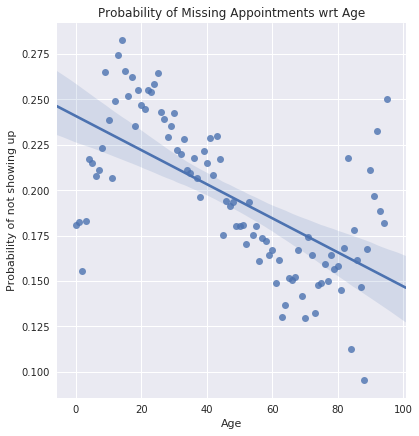

In [30]:
sb.lmplot(data = prob_no_show(df, 'Age'), x = 'Age', y = 'prob_no_show', fit_reg = True, size=6);
plt.title('Probability of Missing Appointments wrt Age');
plt.ylabel('Probability of not showing up');

- The probability of not showing up is lower around at age 0 and ages between 50 and 100. It is lowest at age 88.
- It is higher around at ages between 10 and 40, and highest at age 14.
- In general, the probability of not showing is decrasing in Age.
- We can consider age as an predictor of showing up.

### What is the relationship between showing up and gender?

In [31]:
df.groupby('Gender').No_show.value_counts()


Gender  No_show
F       0          57214
        1          14588
M       0          30954
        1           7724
Name: No_show, dtype: int64

The majority of the patients are females.

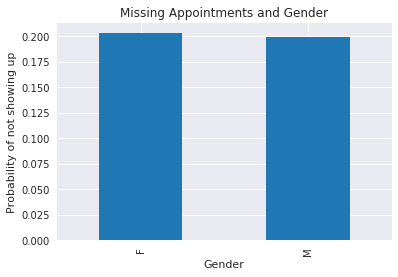

In [32]:
df.groupby('Gender').No_show.mean().plot(kind='bar', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Probability of not showing up');
plt.title("Missing Appointments and Gender" );

The probability of the women did not show is just a little bit higher than the probability of men.

### How are recieving SMS and showing up related?

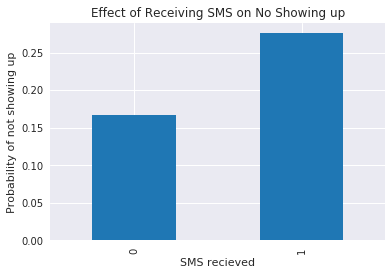

In [33]:
df.groupby('SMS_received').No_show.mean().plot(kind='bar', color=base_color)
plt.xlabel('SMS recieved');
plt.ylabel('Probability of not showing up');
plt.title("Effect of Receiving SMS on No Showing up" );

Recieving SMS seems to have a negative effect on patients showing up.

###  How does recieving SMS affect showing up behavior based on gender?

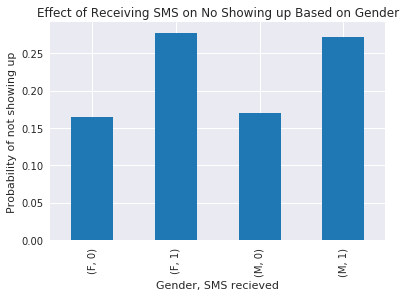

In [34]:
df.groupby(['Gender', 'SMS_received']).No_show.mean().plot(kind='bar', color=base_color);
plt.xlabel('Gender, SMS recieved');
plt.ylabel('Probability of not showing up');
plt.title("Effect of Receiving SMS on No Showing up Based on Gender" );

The probability of showing up is highest for women who did not recieve SMS and it is lowest for women who did recieved SMS.

### What is the relationship between showing up and handicap levels?

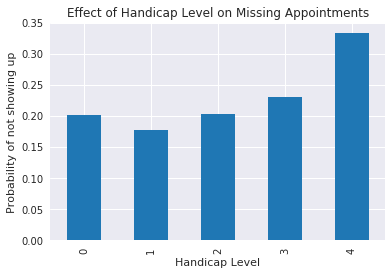

In [35]:
df.groupby('Handicap').No_show.mean().plot(kind='bar', color=base_color);
plt.xlabel('Handicap Level');
plt.ylabel('Probability of not showing up');
plt.title("Effect of Handicap Level on Missing Appointments" );

The patients who has only one handicap showed up to their appointments most. The probability of not showing up is increasing with handicap level except the patients with no handicap. Their probability is almost the same with the probability of patients with two handicaps.

### How does enrolling in Bolsa Familia program affect showing up behavior?

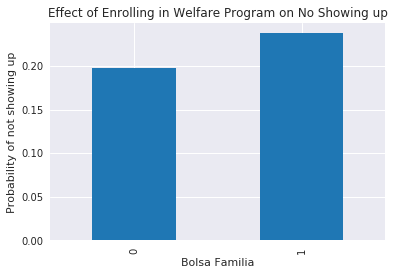

In [36]:
df.groupby('Scholarship').No_show.mean().plot(kind='bar', color=base_color);
plt.xlabel('Bolsa Familia');
plt.ylabel('Probability of not showing up');
plt.title("Effect of Enrolling in Welfare Program on No Showing up" );

Interestingly, patients who enrolled in welfare program missed their appointments more than the patients who did not enrolled in the program.

### How does holding scholarship affect showing up behavior based on gender?

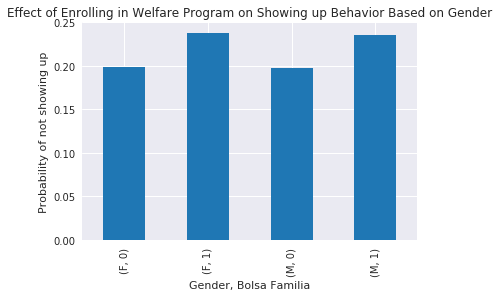

In [37]:
df.groupby(['Gender', 'Scholarship']).No_show.mean().plot(kind='bar', color=base_color);
plt.xlabel('Gender, Bolsa Familia');
plt.ylabel('Probability of not showing up');
plt.title("Effect of Enrolling in Welfare Program on Showing up Behavior Based on Gender" );

The females who are enrolled in the welfare program missed their appointments most, the males who are enrolled in the welfare program follow them but the proportions are very close.

### What is the effect of each diagnosis on showing up behavior based on gender?

#### Investigate the relationship between showing up behavior and Hypertension based on gender

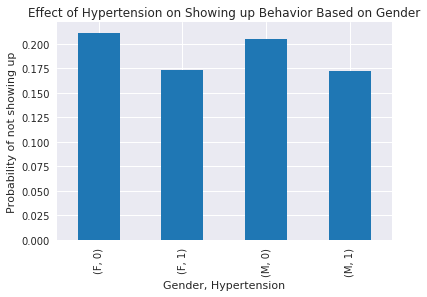

In [38]:
df.groupby(['Gender', 'Hypertension']).No_show.mean().plot(kind='bar', color=base_color)
plt.xlabel('Gender, Hypertension');
plt.ylabel('Probability of not showing up');
plt.title("Effect of Hypertension on Showing up Behavior Based on Gender" );

Both females and males with hypertension have a higher probability to show up than the patients who do not have hypertension.

#### Investigate the relationship between showing up behavior and Diabetes based on gender

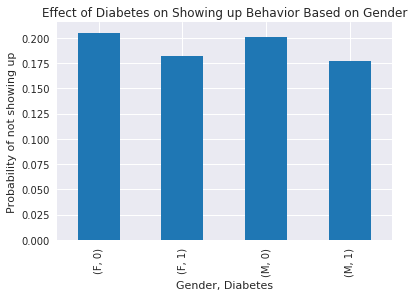

In [39]:
df.groupby(['Gender', 'Diabetes']).No_show.mean().plot(kind='bar', color=base_color)
plt.xlabel('Gender, Diabetes');
plt.ylabel('Probability of not showing up');
plt.title("Effect of Diabetes on Showing up Behavior Based on Gender" );

The result is very similar to the one with Hypertension for the females and males who have diabetes.

#### Investigate the relationship between showing up behavior and Alcoholism based on gender

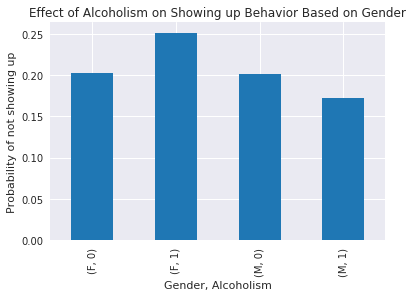

In [40]:
df.groupby(['Gender', 'Alcoholism']).No_show.mean().plot(kind='bar', color=base_color)
plt.xlabel('Gender, Alcoholism');
plt.ylabel('Probability of not showing up');
plt.title("Effect of Alcoholism on Showing up Behavior Based on Gender" );

Males who have alcholism showed up more than both the males who do not have it and the females in general. On the other hand, probability of females with alcoholism showing up is less than the probability of females who do not have it.

Overall, approximately 20 percent of the patients with a diagnosis showed up to their appointments.

### How the appointment day and the showing up is related?

#### Display the number of patients who showed and who did not in each day of the week

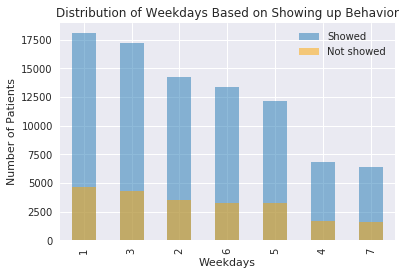

In [41]:
df.Weekday[showed].value_counts().plot(kind = 'bar', alpha=0.5, color = base_color, label = 'Showed');
df.Weekday[not_showed].value_counts().plot(kind = 'bar', alpha=0.5,  color = 'orange', label = 'Not showed');
plt.legend();
plt.xlabel('Weekdays');
plt.ylabel('Number of Patients');
plt.title("Distribution of Weekdays Based on Showing up Behavior" );

In each day of the week, the number of patients who missed their appointment is much more less than the number of patients who did not. In both cases, the number of patients is decreasing from Monday to Sunday. 

#### Look at the relationship between missing appointments and the weekdays

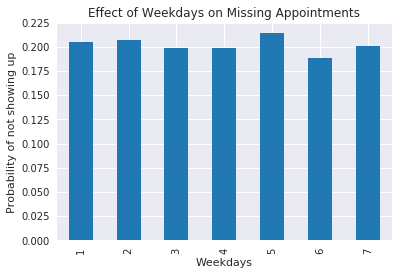

In [42]:
df.groupby('Weekday').No_show.mean().plot(kind='bar', color=base_color)
plt.xlabel('Weekdays');
plt.ylabel('Probability of not showing up');
plt.title("Effect of Weekdays on Missing Appointments" );


The probability of missing an appointment is highest on Friday and lowest on Saturday.

### How does the time difference between the scheluded day and appointment day affect the showing up behavior? 

In [43]:
df.query('Elapsed_time < 0')

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Weekday,Elapsed_time
68,5.43417573869e+12,5552915,F,2016-06-04,2016-04-29,69,JARDIM DA PENHA,0,1,0,0,0,1,0,5,-36
69,793821379148,5552917,F,2016-06-04,2016-04-29,58,SANTO ANDRÉ,0,0,0,0,0,1,0,5,-36
70,6.71448948558e+13,5552914,M,2016-06-04,2016-04-29,62,SOLON BORGES,0,0,0,0,0,0,0,5,-36
71,1.84631773862e+12,5552936,F,2016-06-04,2016-04-29,30,BONFIM,1,0,0,0,0,1,0,5,-36
73,4.54213161295e+13,5552934,F,2016-06-04,2016-04-29,68,REPÚBLICA,0,1,1,0,0,1,0,5,-36
97,5.25334248884e+12,5565493,F,2016-11-04,2016-04-29,35,BONFIM,0,0,0,0,0,1,0,5,-189
98,3.72596436557e+14,5571906,F,2016-12-04,2016-04-29,51,BONFIM,0,0,0,0,0,1,0,5,-219
100,1.66338799399e+14,5574764,F,2016-12-04,2016-04-29,20,BONFIM,0,0,0,0,0,1,0,5,-219
109,1.29598834359e+14,5572081,F,2016-12-04,2016-04-29,34,SANTO ANTÔNIO,0,0,0,0,0,1,0,5,-219
110,3.73742973241e+12,5574527,F,2016-12-04,2016-04-29,34,SANTO ANTÔNIO,0,0,0,0,0,1,0,5,-219


There are too many negavite values in *Elapsed_time* column which does not make sense, because we expect the scheduling day being before appointment day. So, I will drop these negavite values.
There are very high numbers in this column as well. I will drop them, too. Because it does not seem right having that much difference in two dates.

In [44]:
#Drop the rows with the negative values in Elapsed_time
time_between_df = df.drop(df.index[df['Elapsed_time'] < 0])

#Drop the rows with values higher than 100 in Elapsed_time
time_between_df = time_between_df.drop(time_between_df.index[time_between_df['Elapsed_time'] > 100])


#### Line Plot

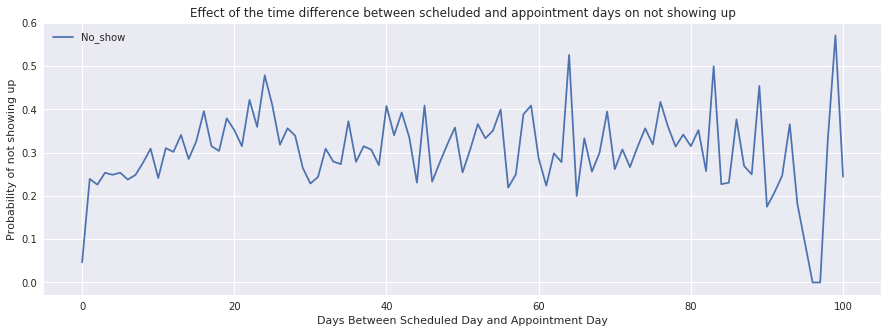

In [45]:
time_between_df[['No_show', 'Elapsed_time']].groupby('Elapsed_time').mean().plot(kind='line', figsize=(15,5));
plt.title("Effect of the time difference between scheluded and appointment days on not showing up");
plt.xlabel('Days Between Scheduled Day and Appointment Day');
plt.ylabel('Probability of not showing up');

#### Scatter Plot

The age with the lowest not showing up probability is 95 
The age with the highest not showing up probability is 98 


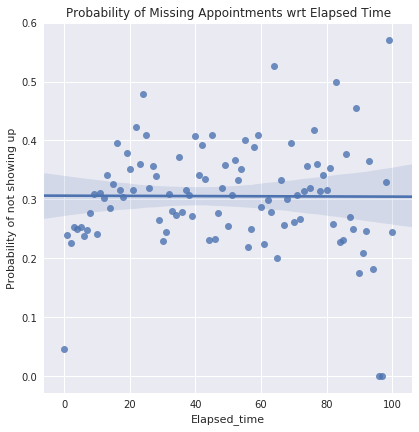

In [46]:
sb.lmplot(data = prob_no_show(time_between_df, 'Elapsed_time'), x = 'Elapsed_time', y = 'prob_no_show', fit_reg = True, size =6);
plt.title('Probability of Missing Appointments wrt Elapsed Time');
plt.ylabel('Probability of not showing up');


The probability of not showing is very close to 0 when the day difference is 0. It is getting higher when the difference increases but it is fluctuates mostly between the probability 0.2 & 0.6 and it is even zero when the time difference is close to 100. So there cannot be found a clear analysis but we an infer that when the time difference is close to zero patients do not miss their appointment.

<a id='conclusions'></a>
## Conclusions
- Overall, 20 percent of the patients missed their appointments.
- There is a negative trend between Age and probability of not showing up. So, age is an important factor in order to predict if a patient will show up for their scheduled appointment.
- There is not much difference between the behavior of females and males.
- Surprisingly, receiving SMS affects showing up in a negative way. Females who got SMS are more likely to miss their appointments. 
- Enrolling in the welfare program also has a negative effect on showing up and females who enrolled in welfare program are less likely to attend their appointments.
- In general, approximately 20 percent of the patients with a diagnosis showed up to their appointments. Females with alcholism has the highest rating of not showing up ( approximately 0.25).
- The probability of not showing up is increasing with handicap level except the patients with no handicap.
- The number of appointments is decreasing from Monday to Sunday. The probability of missing an appointment is highest on Friday and lowest on Saturday, but there is no trend.
- The time difference between the scheduled and appointment days is not a good predictor of showing up.

### Limitations
- Time span is only for 6 months and the appointments are restricted to unique 27 days so I don't think it is enough in order to make a trustable analysis. Also, seasonality might be good predictor for show up rates.
- We only have three diagnosis, adding more dieaseses into the data could help us to have a better understanding on showing up behavior.
- There are lots of negavite values in *Elapsed_time* column. This means that appointment day is before the scheduled day which is not possible. There might be a mistake in the data set and should be corrected to have a better analysis.

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'no_show_appointments.ipynb'])

0